# Consensus and Sample Peak Width Distributions

**Created**: 11 November 2021

## Environment

In [1]:
rm(list=ls())

if (!require("cowplot")) {
    install.packages("cowplot")
}

Loading required package: cowplot



In [2]:
library(tidyverse)
library(data.table)
library(RColorBrewer)
library(cowplot)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## Load Data

In [3]:
sample.info <- read.csv("03_Functional_Interpretation/metadata/reads_calderon_et_al_atac_seq.txt")
rownames(sample.info) <- sample.info$Run
sample.info <- sample.info %>%
    dplyr::select(Run, Donor, Cell.Type=Cell_type, Lineage=lineage, Treatment) %>%
    dplyr::mutate(Donor=factor(Donor), Cell.Type=factor(Cell.Type), Lineage=factor(Lineage)) %>%
    dplyr::mutate(Treatment=recode(Treatment, no_treament="No_Treatment", treatment1="Treatment_1", treatment2="Treatment_2"))

In [4]:
head(sample.info)

,Run,Donor,Cell.Type,Lineage,Treatment
,<chr>,<fct>,<fct>,<fct>,<chr>
SRR7650729,SRR7650729,1001,Bulk_B,B,No_Treatment
SRR7650730,SRR7650730,1001,Bulk_B,B,Treatment_1
SRR7650731,SRR7650731,1001,Mem_B,B,No_Treatment
SRR7650732,SRR7650732,1001,Mem_B,B,Treatment_1
SRR7650733,SRR7650733,1001,Naive_B,B,No_Treatment
SRR7650734,SRR7650734,1001,Naive_B,B,Treatment_1


In [5]:
consensus.peak.set <- fread("~/gains_team282/epigenetics/calderon_et_al/analysis/atac_seq/consensus_peaks.bed")
colnames(consensus.peak.set) <- c("Chr", "Start", "End", "Peak.Count", "Fold.Enrichment", "Log.10.P.Value", "Log.10.Q.Value", "Point.Source")

In [6]:
head(consensus.peak.set)

Chr,Start,End,Peak.Count,Fold.Enrichment,Log.10.P.Value,Log.10.Q.Value,Point.Source
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,23224,23849,18,"4.26835,3.20774,4.19841,3.9716,3.91778,3.14432,3.47702,3.09304,3.84191,3.68994,3.57102,3.52524,3.90613,3.46746,3.82138,2.79586,3.17876,3.78038","6.57404,4.13025,6.19201,5.57457,5.72838,4.2127,4.3671,3.77034,5.84526,4.69559,5.36996,5.06582,5.95644,4.5471,7.07514,3.61423,3.90426,5.26564","4.42707,2.08567,4.23675,3.63835,3.71803,2.35103,2.29233,1.68021,3.5372,2.83948,3.42845,3.07344,4.0007,2.53271,4.8448,1.91686,1.72493,2.95301","59,23,26,24,20,79,89,94,39,64,53,99,324,56,73,141,44,84"
1,24025,26778,94,"4.94474,4.0603,3.85645,4.355,3.47702,4.95791,2.82936,3.81901,3.87631,3.40492,2.94353,3.48865,3.08014,4.19248,4.15701,4.40021,3.20774,4.42679,4.43612,3.9878,3.30419,3.84571,4.43297,4.82383,3.31943,4.77276,4.94031,3.89417,4.06822,3.60755,4.00186,4.23835,3.85645,3.68685,3.17236,3.17629,3.19367,3.81901,3.30465,3.27971,3.62056,4.06822,3.07134,3.32645,3.98404,3.53196,3.91448,4.63602,3.54638,4.79283,3.34613,4.26362,5.10893,3.23946,4.50769,4.06871,3.9355,2.97219,3.08908,4.42679,4.97727,3.30518,3.90474,3.5913,5.38672,4.23835,4.65909,3.49523,2.93174,3.30465,3.32004,3.91448,3.49523,5.34978,4.64523,4.99787,3.98393,3.42916,3.60566,3.76287,3.84191,8.60985,4.01316,5.33363,4.30951,4.21154,4.0667,4.94474,4.37263,3.93504,4.50461,3.89417,4.04932,4.32256","8.00109,6.22119,5.16235,7.28448,4.3671,8.02308,4.00612,5.80549,5.90488,4.44726,3.87001,6.13277,4.10378,5.92828,7.20427,6.7953,4.13025,6.83971,7.13923,6.35515,4.89067,6.1008,7.42356,7.79844,4.50715,8.02044,7.11179,5.93578,5.49424,4.98376,6.38014,6.25743,5.16235,4.50892,4.26012,4.07937,4.29608,5.80549,4.10012,4.24636,5.69118,5.49424,4.27381,4.51887,5.83853,4.64978,5.48257,6.90256,5.10198,8.37,4.75696,6.56607,9.60553,3.83038,6.97445,5.2792,5.75789,4.45928,4.49527,6.83971,7.74636,4.48334,5.95404,4.95711,9.76066,6.25743,6.41714,4.79904,3.68011,4.10012,4.31121,5.48257,4.79904,10.4051,7.20222,8.08975,6.34825,4.68975,5.20308,5.70766,5.84526,16.9843,5.64135,8.32347,8.95822,5.95867,7.03343,8.00109,7.02973,6.26105,6.96933,5.93578,5.46468,5.67214","5.43666,3.87468,3.0124,5.35017,2.29233,5.30376,2.07469,3.74007,3.72492,2.55156,2.13092,4.13939,2.3486,3.90059,5.14816,4.59066,2.08567,4.61074,5.03088,4.13919,3.10647,4.09482,4.95824,5.81765,2.54444,5.7661,4.83579,3.71654,2.96196,2.92582,4.31618,3.8042,3.0124,2.31382,2.77784,2.23338,2.50772,3.74007,2.13927,2.06407,3.59042,2.96196,2.5433,2.59397,3.66413,2.35406,3.6247,4.6315,2.89767,6.02221,2.72946,4.18714,7.8062,1.82153,4.81992,3.24183,3.63266,2.47184,2.54427,4.61074,5.54806,2.61336,3.56617,3.00355,7.55915,3.8042,3.83422,2.71047,1.68484,2.13927,2.25258,3.6247,2.71047,8.38554,5.17376,5.98328,4.25497,2.81187,3.28611,3.83896,3.5372,14.7558,3.63146,6.28167,6.81178,3.84371,5.16063,5.43666,4.62867,4.33076,4.6157,3.71654,3.25641,3.23311","57,846,96,174,181,88,158,210,209,247,154,69,76,151,83,282,16,25,157,56,25,63,98,62,388,131,377,55,65,162,220,81,71,93,168,76,23,105,91,131,418,183,27,98,105,36,154,114,405,33,131,187,322,14,129,156,180,55,87,105,102,72,58,75,190,130,94,165,140,67,36,161,131,90,64,70,69,43,58,93,81,42,115,30,52,91,34,63,31,41,253,36,59,47"
1,28524,30136,184,"118.464,66.1243,180.831,50.2425,77.016,68.4209,87.1592,92.8843,108.536,182.568,63.5779,133.775,81.9138,78.0801,67.6926,75.3414,63.062,52.9569,236.481,170.845,80.056,101.789,107.855,97.5421,158.849,117.188,192.535,152.567,84.9737,185.623,74.7151,148.269,45.5503,30.0741,89.3626,73.927,202.579,59.2356,127.107,60.8675,77.9926,111.604,80.1311,77.824,141.718,87.7381,74.2087,191.181,69.5405,128.196,56.8557,44.7963,41.9712,125.253,89.9732,136.455,89.324,39.529,145.319,74.681,114.153,33.7797,143.217,49.8256,85.7873,85.806,78.7089,96.4364,67.1501,60.5785,36.6318,83.9821,61.7249,33.9368,91.5833,41.2317,29.6669,62.2921,32.4288,98.775,87.7997,30.5521,93.9821,69.8964,66.4863,24.831,108.285,45.2855,16.8711,93.175,64.0645,37.3392,35.3205,46.1134,36.7735,98.6454,120.368,13

In [7]:
sample.peak.widths <- fread("~/gains_team282/epigenetics/calderon_et_al/analysis/atac_seq/peak_widths.tsv")

In [8]:
head(sample.peak.widths)

Sample,Peak_Width
<chr>,<int>
SRR7650729,1502
SRR7650729,223
SRR7650729,380
SRR7650729,191
SRR7650729,1149
SRR7650729,152


## Peak Widths

In [9]:
plot.data <- sample.peak.widths %>%
    as.data.frame() %>%
    dplyr::filter(Peak_Width <= 3000) %>%
    dplyr::mutate(Log.Peak.Width=log10(Peak_Width))

In [10]:
p = ggplot(plot.data) +
    geom_boxplot(aes(x=Sample, y=Peak_Width), fill="white", outlier.shape=NA) +
    scale_y_log10(limits=c(min(plot.data$Peak_Width), max(plot.data$Peak_Width))) +
    annotation_logticks(base=10, sides="l") +
    xlab("Samples") + ylab("Peak Width") +
    ggplot_theme +
    theme(axis.text.x=element_blank())

In [11]:
q = consensus.peak.set %>%
    as.data.frame() %>%
    dplyr::mutate(Peak_Width=End - Start) %>%
    ggplot() +
    geom_boxplot(aes(x="Consensus", y=Peak_Width), fill="white", outlier.shape=NA) +
    scale_y_log10(limits=c(min(plot.data$Peak_Width), max(plot.data$Peak_Width))) +
    annotation_logticks(base=10, sides="l") +
    xlab("Consensus Peak Set") + ylab("Peak Width") +
    ggplot_theme +
    theme(axis.text.x=element_blank())

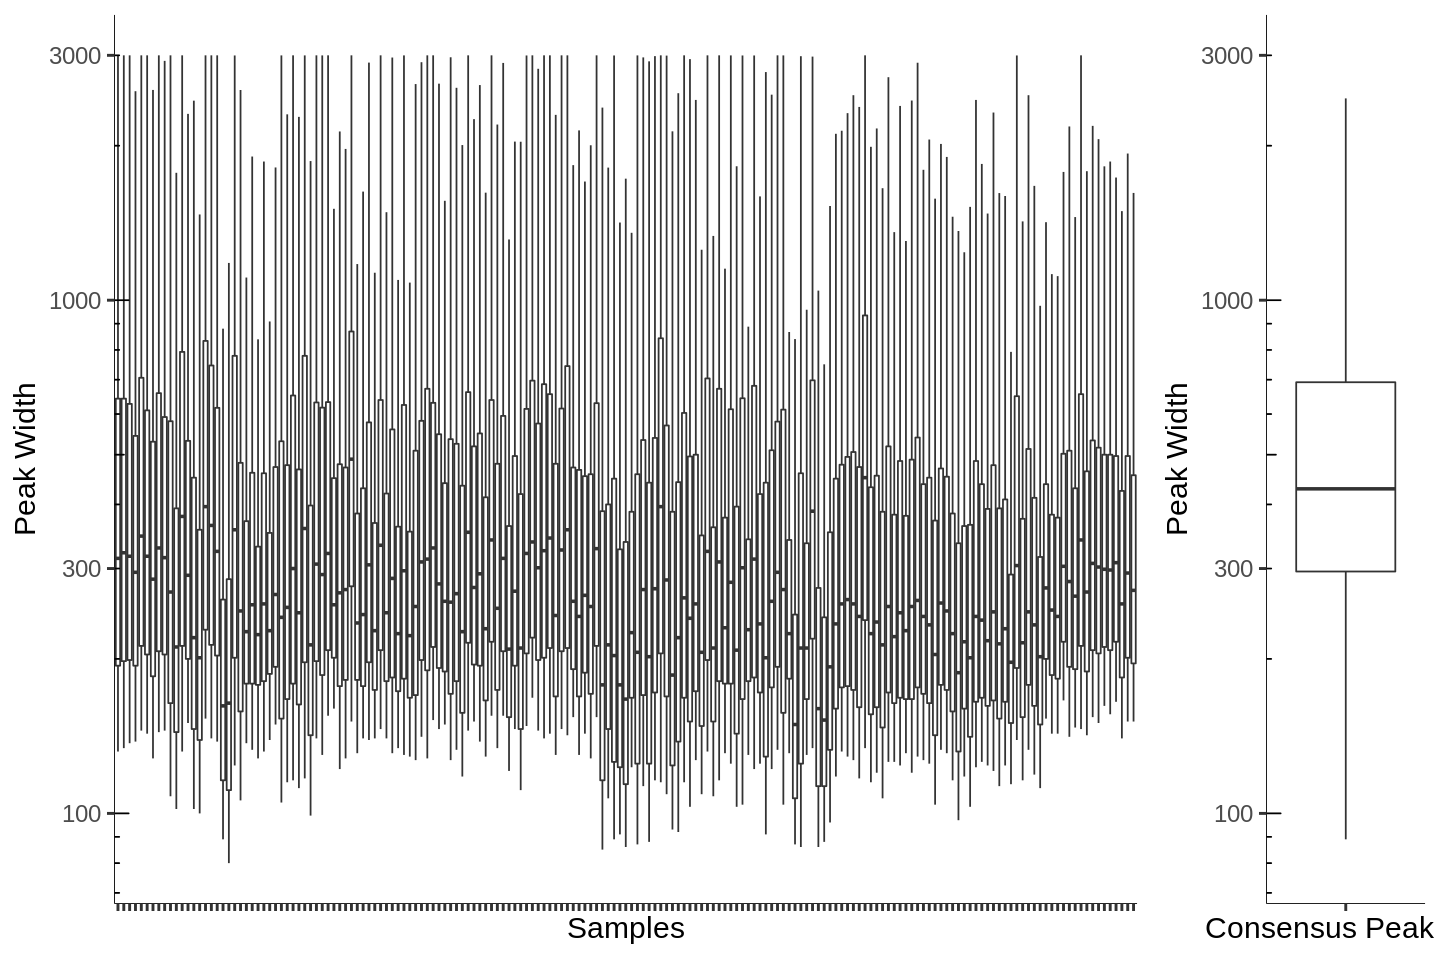

In [12]:
options(repr.plot.width=12, repr.plot.height=8)
cowplot::plot_grid(p, q, rel_widths=c(8, 2))
ggsave("03_Functional_Interpretation/results/consensus_and_sample_peak_width_distributions.svg", width=12, height=8)